## E-tivity 1: Manual gradient descent

In this E-tivity, we will be looking at fitting data to a polynomial, using a manual *gradient descent* approach. This is an important approach that will be fundamental to our neural network models when we get to them later.

The purpose of this E-tivity is to become familiar with linear regression through implementing it from scratch. Use the code stubs provided to implement your version of Tasks 1-4. This means that you will produce code that is not the most efficient, compact nor reusable.

Comment your code extensively! This proves to yourself and us that you do understand the steps needed to implement curve fitting.

For Task 5 you have more freedom to implement functions or class(es) over those from Tasks 1-4. The process is still the same just more difficult to code.  



Grading guidelines:

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=45551&rubricId=1966&originTool=quicklinks


To implement the tasks add cells to the notebook in the appropriate places. Marks will be deducted if the notebook cannot be exexcuted using "Run All".

**To complete the e-tivity submit your notebook with the code for Tasks 1-5. Do not share Task 5.**



In [30]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sympy.codegen.cnodes import sizeof

### Task 1 - Generating some data

We're not going to take any pre-existing data set. Instead, we're going to generate our own data, so we will know exactly what the formula behind it is. We will then start from a random (bad) model and try to fit it to the data as best as we can.

- Start by choosing coefficients for a second degree polynomial equation ($ax^2+bx+c$) that will be the basis of the data you will try to model. This polynomial will be the ideal solution. For example, given respective values of $(2,-4,1)$ for $(a,b,c)$, our base polynomial is: $$y=2x^2-4x+1$$
- Implement an evaluation function for any second degree polynomial, which, given a set of coefficients and a given input $x$ returns the corresponding $y$.
- Complete the code below to implement your function.

In [29]:
# Evaluate quadratic at x, with coefficients a,b,c
def poly_evaluation(a,b,c,x):
    return sum([a*(x ** 2), b*x, c])

- Now in order to simulate imperfect/noisy data, write a jittery evaluation function for the polynomial, which, for a given set of coefficients, a given input $x$ and an extra jitter/error parameter $j$ returns not the corresponding $y$ value but a random value in the interval: $[y-j, y+j]$.
- Choose $j$ so that the noise is obvious but not so much that the original curve is lost.
- Generate some data by generating 100 random $x$ values in the $[-10,10]$ interval and calling your jittery evaluation function on them. Store those matching $x$ and $y$ values as you see fit.
- Complete the code below to implement your function.

In [31]:
# Create imperfect data from quadratic
# a,b,c polynomial coefficints
# x values
# j jitter/error paramemter
def jitter_poly(a,b,c,x,j):
    y = poly_evaluation(a,b,c,x)
    x = np.random.uniform(y - j, y + j)
    
    return y, x

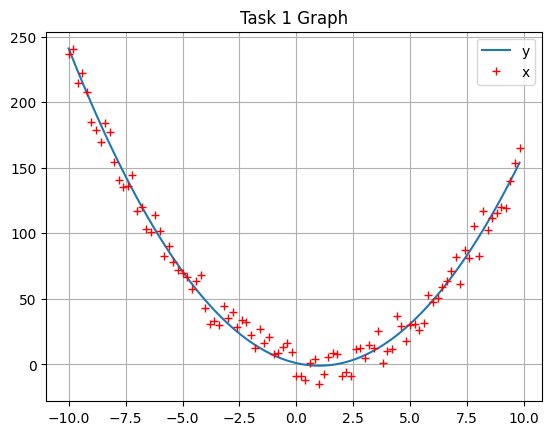

In [32]:
j = 15 
x = np.arange(-10, 10, .2)
y, y_obs = jitter_poly(2, -4, 1, x, j)

plt.figure()
plt.plot(x, y, label='y')
plt.plot(x, y_obs,'r+', label='x')

plt.title('Task 1 Graph')
plt.legend()
plt.grid()

plt.show()

- Finally, using matplotlib, plot that training data.

**Tip: numpy array processing:**

In this E-tivity, you will be manipulating not single numbers but arrays of numbers. It is strongly recommended that you use numpy arrays for that kind of data, and take advantage of in-built array processing for your functions. See the example below for a square function that can seemlessly be used on single values or numpy arrays:

In [33]:
%matplotlib inline 
import numpy as np

# this square function will work just fine if x is a numpy array
def my_square_function(x):
    return x*x

# testing single values
print( my_square_function( 2 ) )
print( my_square_function( 3 ) )
print( my_square_function( 9 ) )

# testing multiple values: numpy array first, then standard python tuple
print( my_square_function( np.array([2, 3, 9]) ) ) # works
try:
    print( my_square_function( [2, 3, 9] ) )       # doesn't work
except TypeError:
    print( "TypeError detected" )

4
9
81
[ 4  9 81]
TypeError detected


Importing the numpy module as 'np' is a typical convention that you will often find in other people's code. Finally, while you likely won't require much more from numpy for this particular E-tivity, feel free to look up some documentation/tutorials if you're curious: it's a key Python module that you're likely to use a lot over time.

[Would you like to know more?](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html)

**Tip: generating random numbers:**

You will need a way to generate random numbers. A simple way to do that is through the **random** module whose *random.random()* function will return you a random value between 0 and 1 using a uniform distribution. Simply multiply that by a maximum value and you will get a random number between 0 and your maximum.

The **numpy** module also has its own random functions, which directly support arrays. The *numpy.random.rand(n)* function will return an array of $n$ random values between 0 and 1. Again, we can simply multiply that array by a maximum value to convert all $[0,1]$ interval values to the $[0,maximum]$ interval.

In [34]:
## random numbers examples

import random

print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-1: " + str( random.random() ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )
print( "Random value 0-100: " + str( random.random() * 100 ) )

import numpy as np

print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-1" + str( np.random.rand(10) ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))
print( "10 random values 0-100" + str( np.random.rand(10) * 100 ))

Random value 0-1: 0.6883047158438352
Random value 0-1: 0.2549123993155361
Random value 0-1: 0.35153137773885457
Random value 0-100: 97.0484616058888
Random value 0-100: 15.447260956623342
Random value 0-100: 79.75808273395494
10 random values 0-1[0.4604319  0.07591176 0.94330569 0.99237641 0.4106098  0.89476755
 0.34315592 0.61493222 0.04272973 0.10114051]
10 random values 0-1[0.89614824 0.10681664 0.2864033  0.38096212 0.74108343 0.73695355
 0.09957119 0.98162421 0.17333726 0.65325979]
10 random values 0-1[0.31591845 0.92065337 0.33865988 0.26518554 0.38332685 0.90822515
 0.36960412 0.10390167 0.92687998 0.86327461]
10 random values 0-100[17.10051706 42.26565954 35.60854977 52.85955102 93.13745378  3.82845629
 95.54114444 74.79353045 66.36034499 23.47272489]
10 random values 0-100[35.76811937 51.13505094 28.77253029 33.42743194 90.83803085 62.4312699
 69.72610352 81.35251731 78.19057766 85.45372653]
10 random values 0-100[52.73342384 27.67483393 47.66079958 27.57681277 92.0311775  31.

**Tip: basic plotting with matplotlib:**

The *matplotlib.pyplot()* function will be your basic plotting device. Simply call it with two matching sets of numbers, the first being the $x$ values and the second being the $y$ values. Then, an optional third parameter is used to define what you want to draw using those points. The two letter codes in the example below show you how the first character determines a colour ('b' for blue, 'r' for red, 'g' for green) and the second one the type of graphic object to draw ('-' for a line, 'o' for big dots, '+' for crosses). Note how you can overlay multiple plots together before rendering to screen.

[Would you like to know more?](https://matplotlib.org/tutorials/introductory/pyplot.html)

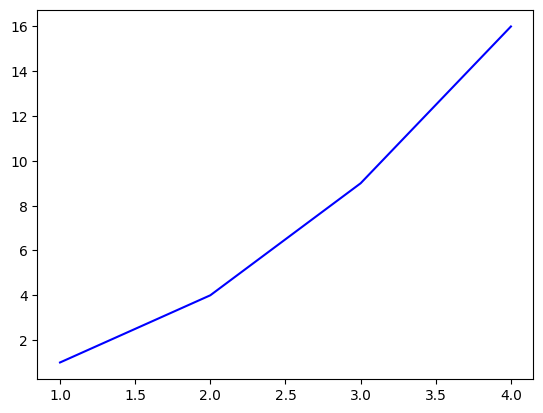

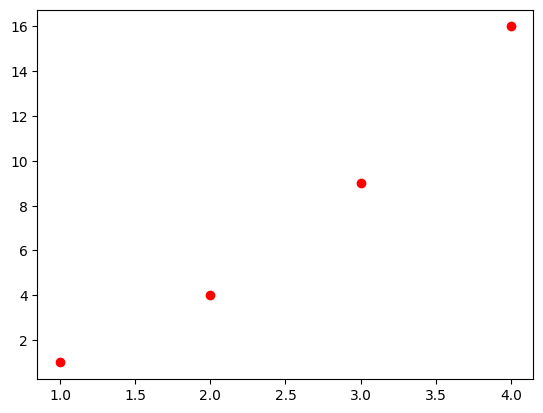

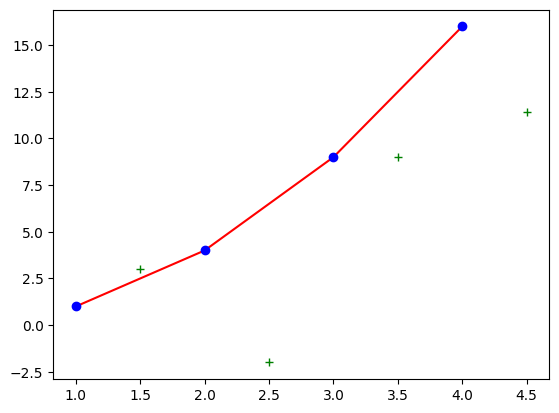

In [35]:
# matplotlib pyplot, basic plotting
import matplotlib.pyplot as plt

# blue line
plt.plot([1,2,3,4], [1,4,9,16], 'b-')
plt.show()

# red dots
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.show()

# red line, blue dots and green crosses
plt.plot([1,2,3,4], [1,4,9,16], 'r-')
plt.plot([1,2,3,4], [1,4,9,16], 'bo')
plt.plot([1.5,2.5,3.5,4.5], [3,-2,9,11.4], 'g+')
plt.show()

### Restrictions

**Numpy has many functions, some of which are not appropriate for this e-tivity. In particular there are some specially for polynomials. The use of these circumvents the purpose of the e-tivity and are thus not to be used.**

If in doubt about whether you can use any particular function or python package, then ask on the Forums.

## Task 2 - Loss

- Generate and store random coefficients for a second degree polynomial ($y=ax^2+bx+c$), this will be your initial model, which you will aim to improve until it fits the data well enough.
- Calculate your model's predicted $\hat{y}$ output values from the Task 1 training data $x$ input values.
- For all the training $x$ values, plot both observed values (the $y_{jitter}$ values from the training data) and the predicted values (the $\hat{y}$ values from your model) on the same graph, to get an immediate visualisation of how good (or more likely how bad) is your current model.
- Implement a loss function, which, given observed values and predicted values, returns the mean squared error. This provides you with a quantified evaluation of how bad the model is: the lower the loss, the better the model.
- Complete the code below to implement the loss fucntion.

In [36]:
# Loss function (mean squared error)
# y_obs observed y values
# y_hat predicted y values from model
def loss(y_obs, y_hat):
    return np.mean(np.square(y_obs - y_hat))

**Tip: Mean Squared Error (MSE):**

The MSE is the mean value of the sum of squared differences between observed and predicted values. So for input values $x_1,\dots,x_n$, with the observed outputs $y_1,\dots,y_n$ and predicted values $\hat{y}_1$ to $\hat{y}_n$, the MSE $E$ is: $$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-\hat{y}_i)^2}$$

**Tip: Numpy (again):**

Numpy arrays have handy methods to be summed up, mean'ed, etc. Using these may spare you some manual loops.

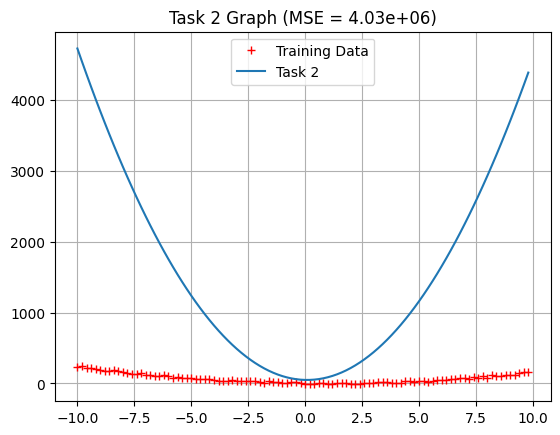

In [37]:
def generate_coefficients (cap_coefficient) :
    return np.random.randint(cap_coefficient * -1, cap_coefficient, 3)

# INITIAL MODEL 
a, b, c = generate_coefficients(50)
    
y_task2 = poly_evaluation(a,b,c, x)
mse_task2 = loss(y_obs, y_task2)

# Plot the model
plt.figure()
plt.plot(x, y_obs,'r+', label='Training Data')
plt.plot(x, y_task2, label='Task 2')

plt.title('Task 2 Graph (MSE = {:.3})'.format(mse_task2))
plt.legend()
plt.grid()
plt.show()


## Task 3 - Gradient calculation and loss reduction

In order to make your model fit the data better, you want to modify its $a$, $b$ and $c$ coefficients so that the error decreases. That means you first need to know how each coefficient affects the error. We can achieve this by calculating the partial derivative of your loss function with respect to each indifidual coefficient.

In our case, our loss function is the MSE, so this is the function we will want to calculate partial derivatives on:
$$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-\hat{y}_i)^2}$$

With:
$$\hat{y}_i = ax_i^2+bx_i+c$$

So we can reformulate our loss as:
$$E=\frac{1}{n}\sum\limits_{i=1}^{n}{(y_i-(ax_i^2+bx_i+c))^2}$$

In this specific case, our partial derivatives for that loss function are the following:

- Partial derivative with respect to $a$:
$$\frac{dE}{da}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i^2(y_i-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $b$:
$$\frac{dE}{db}=\frac{-2}{n}\sum\limits_{i=1}^{n}{x_i(y_i-(ax_i^2+bx_i+c))}$$

- Partial derivative with respect to $c$:
$$\frac{dE}{dc}=\frac{-2}{n}\sum\limits_{i=1}^{n}{(y_i-(ax_i^2+bx_i+c))}$$

If you calculate the value of each derivatives when filling up all other variables, what you get is the $gradients$ for your coefficients. These are the values that give you the slope of the loss function with regards to each specific coefficient, indicating whether you should increase or decrease it to reduce the loss, and also by how much it should be safe to do so.

Given coefficients $a$, $b$ and $c$, calculated gradients $g_a$, $g_b$ and $g_c$ and a learning rate $lr$, you typically would update your coefficients so that their new, updated values are defined as below:

$$a_{new}=a-lr\times g_a$$
$$b_{new}=b-lr\times g_b$$
$$c_{new}=c-lr\times g_c$$

If you apply that new model to the data, your loss should have decreased.

- Decide on an initial learning rate. It should be a small value, try starting with $0.0001$ but feel free to experiment with different values.
- Implement a gradient calculation function which, given a second degree polynomial's coefficients, as well as a set of inputs $x$ and a corresponding set of actual outputs $y$ will return the respective gradients for each coefficient.
- Check the loss of your current model, call your gradient calculation function, adjust your model's coefficients accordingly, and check that the updated model's loss is smaller.
- Check this improvement visually by plotting training data, original model and updated model on a same plot.
- Complete the code below to implement Task 3.

In [38]:
# Calculate the gradients for each paramemter a,b and c
def gradients(a,b,c,x,y):
    y_hat = poly_evaluation(a,b,c,x)
    error = y - y_hat
    
    ga = np.mean(x**2 * error) * -2
    gb = np.mean(x * error) * -2
    gc = np.mean(error) * -2
    
    return [ga, gb, gc]

In [39]:
# Update the parameters
# a,b,c old parameter values
# ga,gb,gc gradients wrt each parameter
# lr learning rate
def update_params(a,b,c,ga,gb,gc,lr):
    
    anew = a - (lr * ga)
    bnew = b - (lr * gb)
    cnew = c - (lr * gc)
    
    return [anew, bnew, cnew]

Model improved


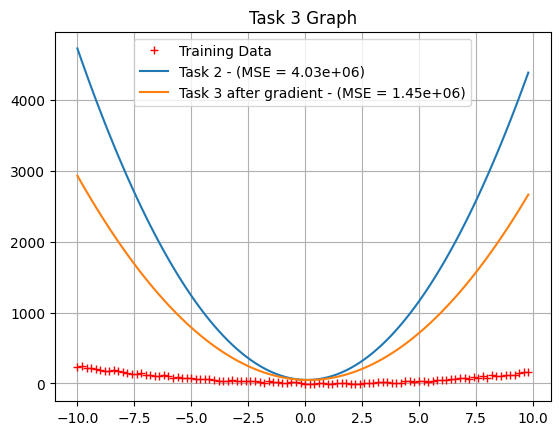

In [40]:
lr = 0.0001

ga, gb, gc = gradients(a,b,c,x, y_obs)
anew, bnew, cnew = update_params(a,b,c,ga,gb,gc,lr)
y_task3 = poly_evaluation(anew, bnew, cnew, x)

mse_task3 = loss(y_obs, y_task3)

print("Model improved" if mse_task3 < mse_task2 else "Model worsening")
    
# Plot the model
plt.figure()
plt.plot(x, y_obs,'r+', label='Training Data')
plt.plot(x, y_task2, label='Task 2 - (MSE = {:.3})'.format(mse_task2))
plt.plot(x, y_task3, label='Task 3 after gradient - (MSE = {:.3})'.format(mse_task3))

plt.title('Task 3 Graph')
plt.legend()
plt.grid()

plt.show()


In [41]:
exit_threshold = 1e-2
lr_initial = 0.0001

loss_values = [mse_task3]
a_task4, b_task4, c_task4 = anew, bnew, cnew

y_task4 = None
mse_task4 = None

previous_loss = float('inf')
index = 0
while True:
    
    ga_task4, gb_task4, gc_task4 = gradients(a_task4, b_task4, c_task4, x, y_obs)
    
    # update the lr as we loop to speed up the process  
    lr = lr_initial * (1 / (1 + 0.01 * index))
    
    a_task4, b_task4, c_task4 = update_params(a_task4, b_task4, c_task4, ga_task4, gb_task4, gc_task4, lr)
    y_task4 = poly_evaluation(a_task4, a_task4, a_task4, x)
    
    mse_task4 = loss(x, y_task4)
    current_loss = mse_task4
    
    # don't store all the values 
    if abs(previous_loss - current_loss) > 0.5:
        loss_values.append(current_loss)
        
    # see if we can exit if threshold reached  
    if abs(previous_loss - current_loss) < exit_threshold:
        break
        
    previous_loss = current_loss  
    index += 1

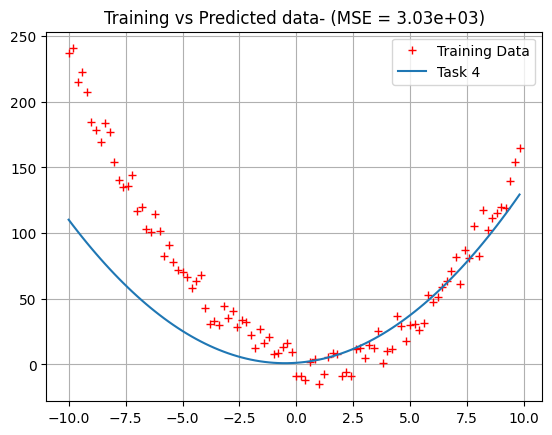

In [42]:
# plot Training data VS Predicted data
plt.figure()
plt.plot(x, y_obs,'r+', label='Training Data')
plt.plot(x, y_task4, label='Task 4')

plt.title('Training vs Predicted data- (MSE = {:.3})'.format(mse_task4))
plt.legend()
plt.grid()
plt.show()

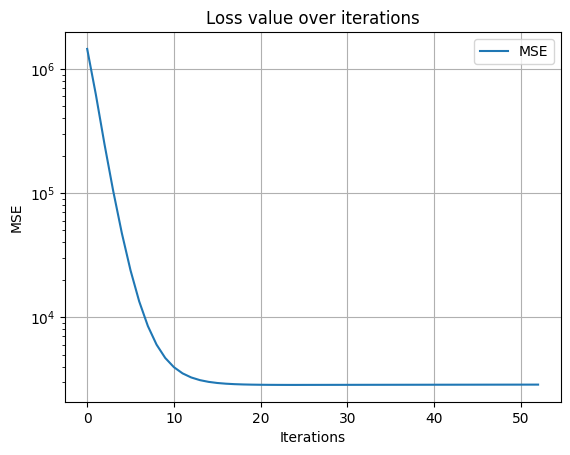

In [43]:
# plot MSE over time 
fig1 = plt.figure()
plt.semilogy(np.arange(0, len(loss_values)), loss_values, label='MSE')

plt.title('Loss value over iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.grid()#
plt.show()

## Reflection
1)	I did not get any inspiration from anybody in group 3, most of the inspiration was external: regarding the learning date, adding momentum, the exit strategy and what to do when the Loss value is positive or negative for Task 5 and default hyper values. 
2)	
The MSE logic was picked-up by default, all we had to do is fill in the blanks, since the test data in condensed we can’t use the MAE logic and since we don't have a lot of outliers MSE will do, as it helps converge to the minima efficiently. Squaring the value does increase the rate of training, but in our second-degree polynomial the loss value doesn't lead to a large jump. So, in a way this is one of the drawbacks of MSE, outliers can mess up the calculations.
3)	
The "gradients" and "update_params" where picked, so all I had to do, is fill in the blanks.
4)	
The learning rate value of "0.0001" was picked as a default value, as in many other machine learning algorithms. I played around with the value and each time it led to a positive MSE, so I stayed with "0.0001". However, I did change the logic to let the learning rate evolve, to speed up the process for Task 1 to 5. With small steps it takes a long time to reach the minima and by evolving the learning rate with this formula "lr = 0.0001 * (1 / (1 + 0.01 * index))" we are hoping to reach the minim faster. The only issue we may over-shot it, but I was not able to see any cases of that happening with a second-degree polynomial (for Task 5 I did see some cases).
5)	
The MSE value is calculated after each loop, this helps with memory management and I also don't store all the values for Task 1 to 4, I use this formula "abs(previous_loss - current_loss) > 0.5". The value 0.5 was picked as standard for this type of cases. I played with 0.2 and too many values were getting lost.
6)	
 The threshold of "1e-2" is used when the diff of the current MSE and previous MSE goes below to exit the calculations. Again, standard value, I tried with the value 1e-6, however it took longer, and the final loss value was not better. So, I left it at 1e-2, since the error margin is acceptable.
7)	
 I don't have a max number of run as a strategy to exit the calculations for Task 1 to 4, as I feel for this POC I would be a crude solution and naive way to stop the calculations. The threshold value in combination with the learning rate, should be the driving force behind the exit strategy. For Task 5, I set the max runs to 5000, for the simple reason I noticed, the loss value would go up and then down and that is why I don't exit the calculations if the Loss goes up, for large degrees and coefficients.
8)	
For Task 5 I went with Huber Loss and not MSE, as Huber Loss is perfect for the scenario at hand, where data is compact, and I don't have to worry about outliers, and I did notice an improvement in the final loss value. I also played with "log_cosh_loss", big improvement on tha overall loss value (but since we are not allowed to use the external library, I commented out the code). 
9)	
For Task 5 I had to keep the random data between -2 and 2 with .2 steps as it was throwing an overflow error.
10)	
 For Task 5 I added clipping between [-1e10, 1e10] for the error calculation ("y_obs - y_hat”) to make sure we don't get in to overflow and it has stopped issue with 10th and above degree polynomials, also added validations to the gradient value to make sure it was not NAN or infinity. I could have added validations for size of matrix or vectors, but it would add extra noise to the code. In the real world for sure, but I rather exit gracefully than with a big crash. 
11)	
 For Task 5 I also added some momentum to the gradient calculations "beta * momentum + (1 - beta) * gradient”, to get over some flat areas, since I removed the exit criteria for when the loss value goes into positive area, I thought we could end up in a false minimum, so why not try adding momentum to overcome fake minimums. However, for very large degrees ie 15, the calculations end up in a positive area and never exit it. That is why the max run of 5k. By adding momentum my overall number of steps is low. If the threshold of 5k runs is reached, it is because the loss value went into positive territory and never came back. The momentum also noticed works with big coefficients, if stay below 5 it adds no value. 
12)	
For Task 5 I even tried to mix up the loss functions (Huber Loss and log_cosh_loss), the 1st run would over-shot, but then it would correct itself. Again, since out of scope, I only left the Huber Loss logic in place other commented out.

